In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
data = pd.read_excel("DataBCHeadset.xlsx")

In [176]:
data.head()

,Country,University,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Simon Fraser University,NaN,NaN,NaN,NaN,2.0,2.0,2.0,3.0,1.0,NaN
1,NaN,The University of British Columbia (Okanagan),NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,2.0,2.0
2,NaN,The University of British Columbia (Vancouver),NaN,NaN,1.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0
3,NaN,The University of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,Thompson Rivers University,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [177]:
data['Country'] = data['Country'].ffill()

#remove Canada from the dataframe
data = data[data['Country'] != 'Canada']

In [178]:
data

,Country,University,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Simon Fraser University,NaN,NaN,NaN,NaN,2.0,2.0,2.0,3.0,1.0,NaN
1,Afghanistan,The University of British Columbia (Okanagan),NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,2.0,2.0
2,Afghanistan,The University of British Columbia (Vancouver),NaN,NaN,1.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0
3,Afghanistan,The University of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,Afghanistan,Thompson Rivers University,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
885,Unknown/Stateless,The University of British Columbia (Vancouver),45.0,13.0,4.0,5.0,4.0,5.0,6.0,6.0,7.0,6.0
886,Unknown/Stateless,The University of Northern British Columbia,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,Unknown/Stateless,The University of Victoria,17.0,6.0,4.0,6.0,4.0,5.0,3.0,NaN,NaN,NaN
888,Unknown/Stateless,Thompson Rivers University,298.0,79.0,58.0,17.0,25.0,42.0,49.0,81.0,61.0,46.0


In [179]:
# Convert the dataset from wide to long format
data_long = pd.melt(data, id_vars=['Country', 'University'], var_name='Year', value_name='Enrollment')
data_long['Year'] = data_long['Year'].astype(int)  # Ensure the 'Year' column is of integer type
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')  # Convert Enrollment to numeric, setting errors='coerce' will convert non-numeric values to NaN


In [180]:
data_long

,Country,University,Year,Enrollment
0,Afghanistan,Simon Fraser University,2013,NaN
1,Afghanistan,The University of British Columbia (Okanagan),2013,NaN
2,Afghanistan,The University of British Columbia (Vancouver),2013,NaN
3,Afghanistan,The University of Victoria,2013,NaN
4,Afghanistan,Thompson Rivers University,2013,1.0
...,...,...,...,...
8875,Unknown/Stateless,The University of British Columbia (Vancouver),2022,6.0
8876,Unknown/Stateless,The University of Northern British Columbia,2022,NaN
8877,Unknown/Stateless,The University of Victoria,2022,NaN
8878,Unknown/Stateless,Thompson Rivers University,2022,46.0


In [181]:
data_long=data_long[data_long['Country']!= 'Grand Total']

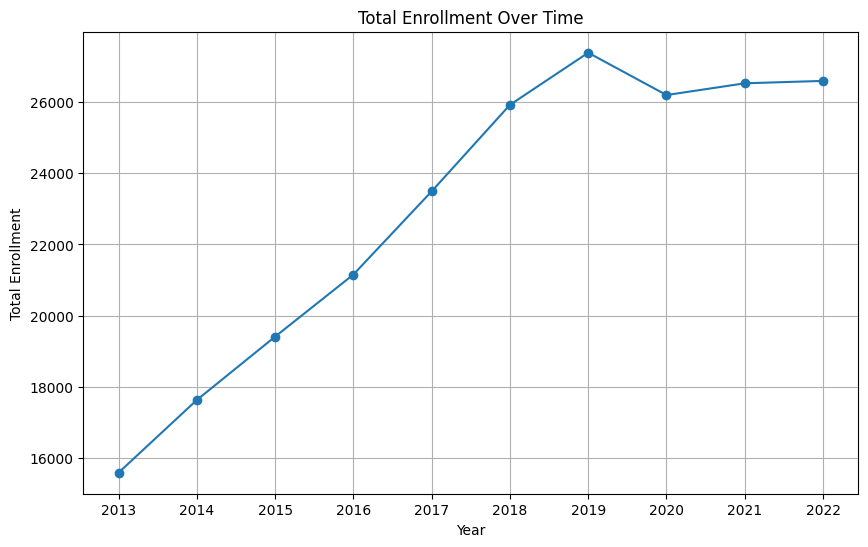

In [182]:
# Total enrollment over time
plt.figure(figsize=(10, 6))
data_long.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o')
plt.xticks(data_long['Year'].unique())
plt.title('Total Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.grid(True)
plt.show()

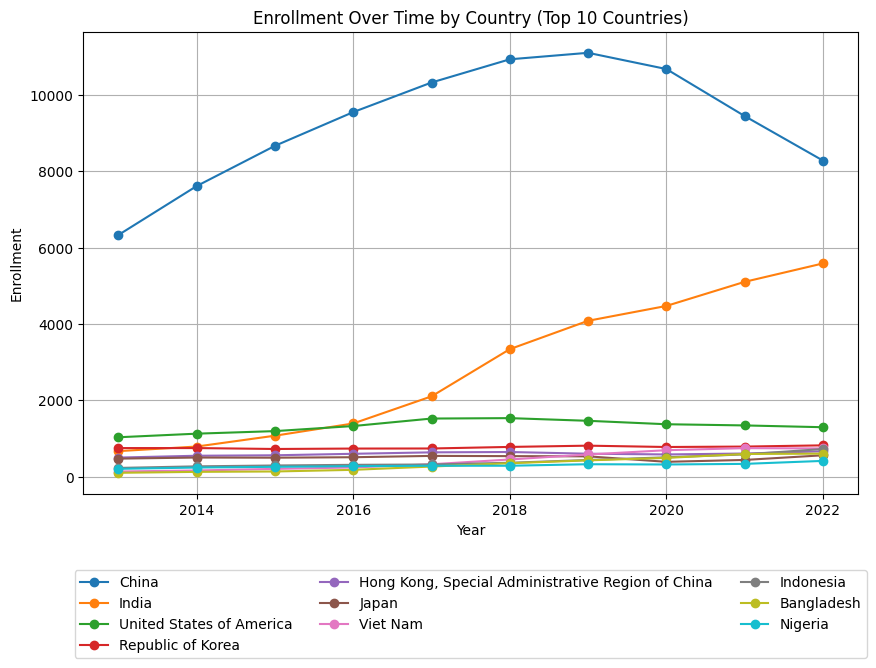

In [183]:
# Enrollment by Country over time for the top 10 countries
plt.figure(figsize=(10, 6))
top_countries = data_long.groupby('Country')['Enrollment'].sum().nlargest(10).index
for country in top_countries:
    data_country = data_long[data_long['Country'] == country]
    data_country.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o', label=country)
plt.title('Enrollment Over Time by Country (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.show()

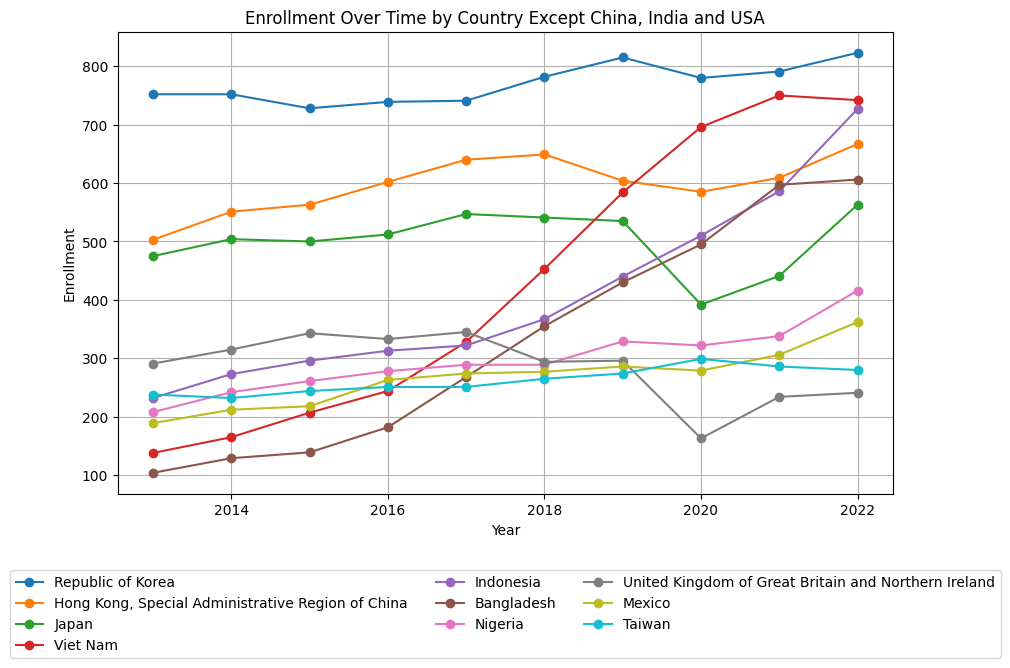

In [184]:
# Enrollment by Country over time for the top 10 countries except China, India and USA
plt.figure(figsize=(10, 6))
top_countries = data_long.groupby('Country')['Enrollment'].sum().nlargest(13).index
top_countries = top_countries[3:]
for country in top_countries:
    data_country = data_long[data_long['Country'] == country]
    data_country.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o', label=country)
plt.title('Enrollment Over Time by Country Except China, India and USA')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.show()

# Year on Year Growth

## Last 10 years

In [185]:
# Convert 'Year' and 'Enrollment' to numeric
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Specify the period of interest
last_year = 2022
start_year = 2013

# Filter countries with more than 100 students in 2023
countries_with_100_plus = data_long[(data_long['Year'] == last_year) & (data_long['Enrollment'] > 100)]['Country'].unique()

# Calculate total enrollment for each country at the start and end of the period, only for countries with more than 100 students in 2023
start_totals = data_long[(data_long['Year'] == start_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()
end_totals = data_long[(data_long['Year'] == last_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()

# Calculate growth rates for these countries
growth_rates = ((end_totals - start_totals) / start_totals) * 100

# Remove any NaN or infinite values that may have resulted from division by zero
growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

print("Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):")
print(growth_rates.nlargest(10))

Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):
Country
India                         731.398810
Bangladesh                    482.692308
Viet Nam                      437.681159
Iran (Islamic Republic of)    422.077922
Philippines                   256.923077
Zimbabwe                      232.608696
Indonesia                     213.362069
Turkey                        186.666667
Brazil                        114.400000
Nigeria                       100.000000
Name: Enrollment, dtype: float64


C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\2264317157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\2264317157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


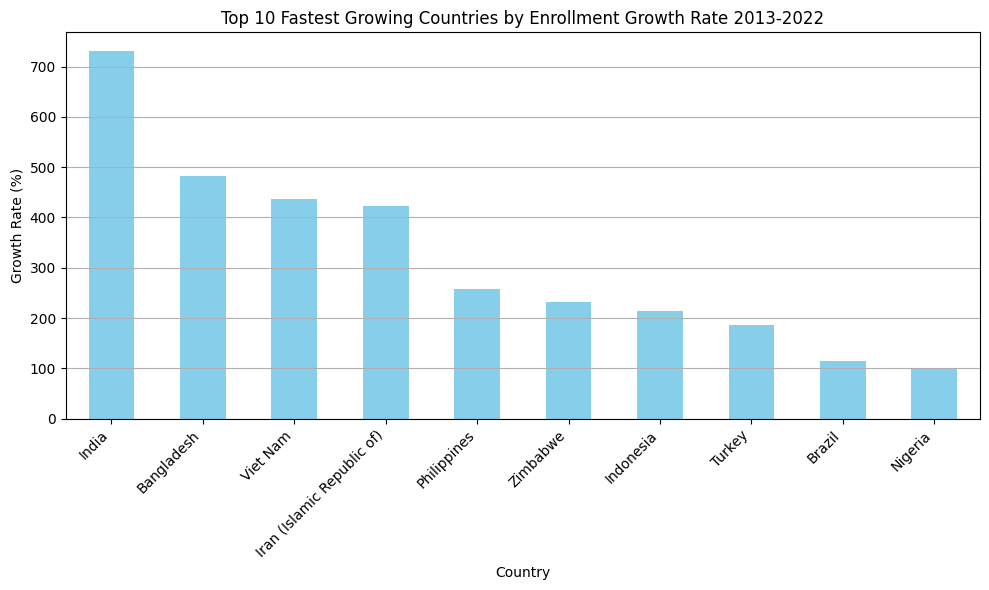

In [186]:
growth_rates.nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Fastest Growing Countries by Enrollment Growth Rate 2013-2022')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\357827942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\357827942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


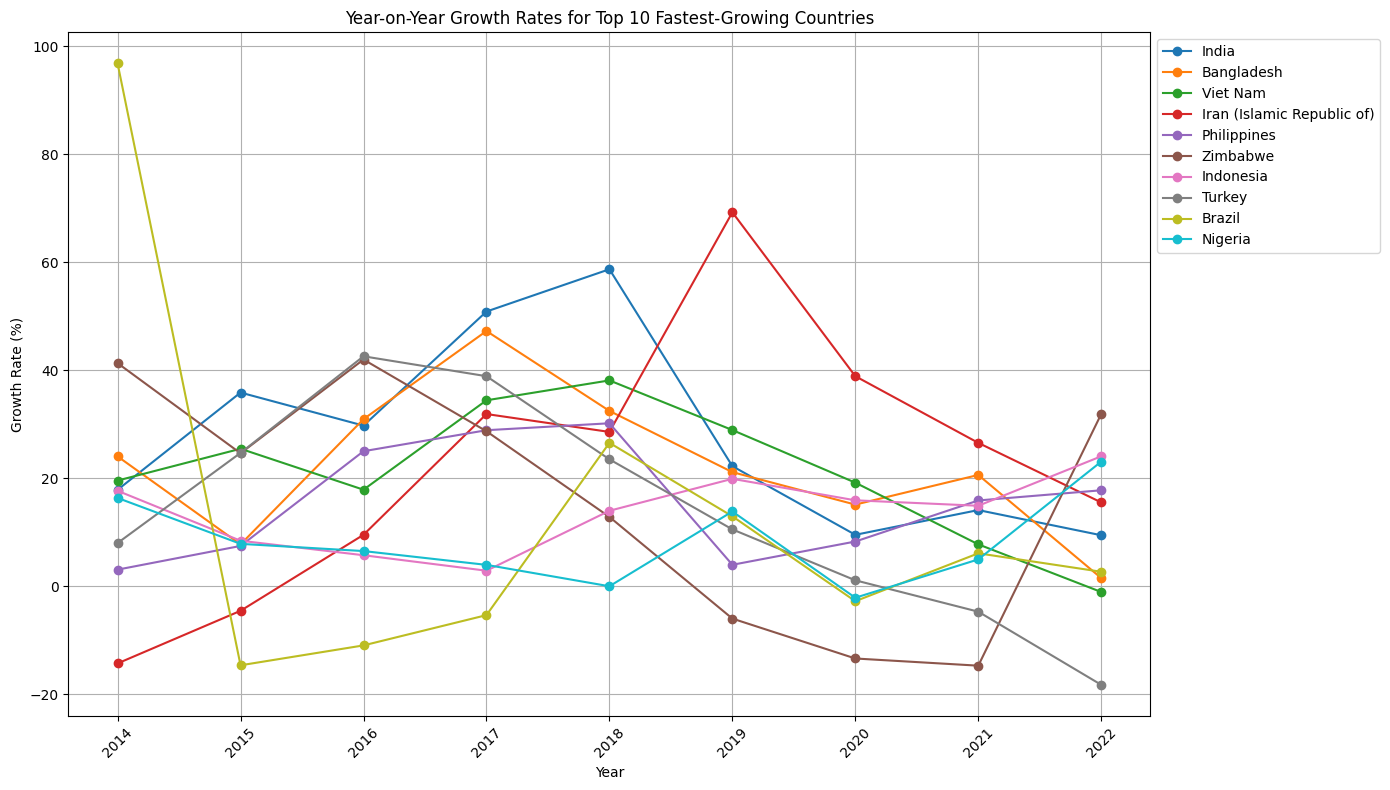

In [187]:
# Convert 'Year' and 'Enrollment' to numeric if they're not already
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Pivot data to have years as columns for each country
pivot_df = data_long.pivot_table(index='Country', columns='Year', values='Enrollment', aggfunc='sum')

# Calculate year-on-year percentage growth for each country
year_on_year_growth = pivot_df.pct_change(axis=1) * 100

# Filter for only the top 10 countries
top_10_growth = year_on_year_growth.loc[growth_rates.nlargest(10).index]

# Plotting
plt.figure(figsize=(14, 8))

# Ensure the DataFrame is not empty
if not top_10_growth.empty:
    for country in growth_rates.nlargest(10).index:
        # Some countries might not have complete data for all years, leading to NaN values in year-on-year growth.
        # Ensure there's data for at least one year before attempting to plot.
        if country in top_10_growth.index and not top_10_growth.loc[country].isnull().all():
            plt.plot(top_10_growth.columns, top_10_growth.loc[country], marker='o', label=country)
        else:
            print(f"Skipping {country} due to insufficient data.")

    plt.title('Year-on-Year Growth Rates for Top 10 Fastest-Growing Countries')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.xticks(rotation=45)  # Assuming the years are properly ordered; if not, you might need to sort them first.
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the top 10 countries.")

## Last 5 years

In [188]:
# Convert 'Year' and 'Enrollment' to numeric
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Specify the period of interest
last_year = 2022
start_year = 2018

# Filter countries with more than 100 students in 2023
countries_with_100_plus = data_long[(data_long['Year'] == last_year) & (data_long['Enrollment'] > 100)]['Country'].unique()

# Calculate total enrollment for each country at the start and end of the period, only for countries with more than 100 students in 2023
start_totals = data_long[(data_long['Year'] == start_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()
end_totals = data_long[(data_long['Year'] == last_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()

# Calculate growth rates for these countries
growth_rates = ((end_totals - start_totals) / start_totals) * 100

# Remove any NaN or infinite values that may have resulted from division by zero
growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

print("Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):")
print(growth_rates.nlargest(10))

Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):
Country
Iran (Islamic Republic of)    243.589744
Indonesia                      98.092643
Bangladesh                     70.704225
India                          67.175344
Viet Nam                       63.796909
Philippines                    53.642384
Nigeria                        43.944637
Mexico                         30.685921
Brazil                         19.642857
Thailand                        6.285714
Name: Enrollment, dtype: float64


C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\3833124204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\3833124204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


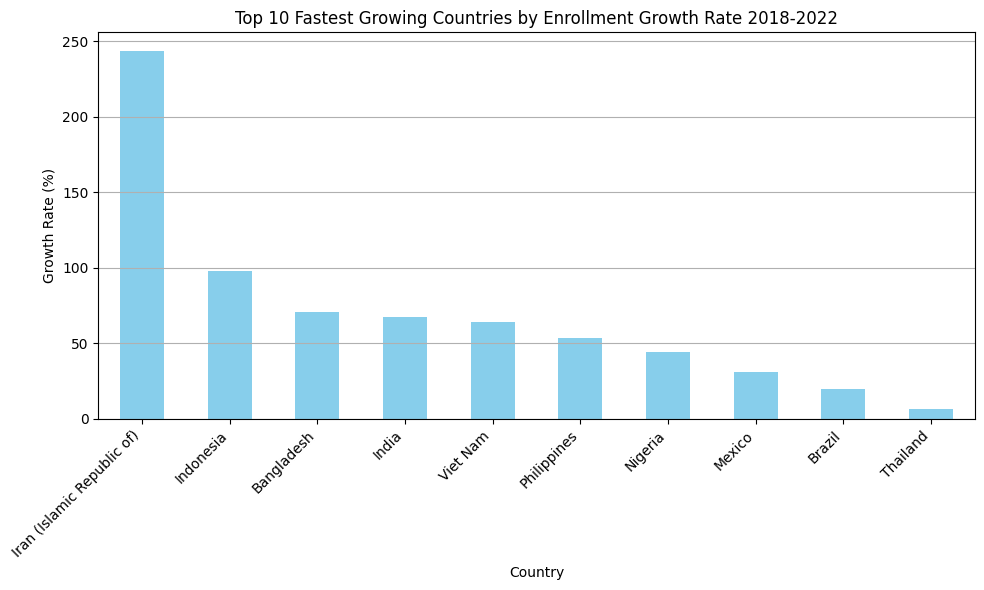

In [189]:
growth_rates.nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Fastest Growing Countries by Enrollment Growth Rate 2018-2022')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1222126664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1222126664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


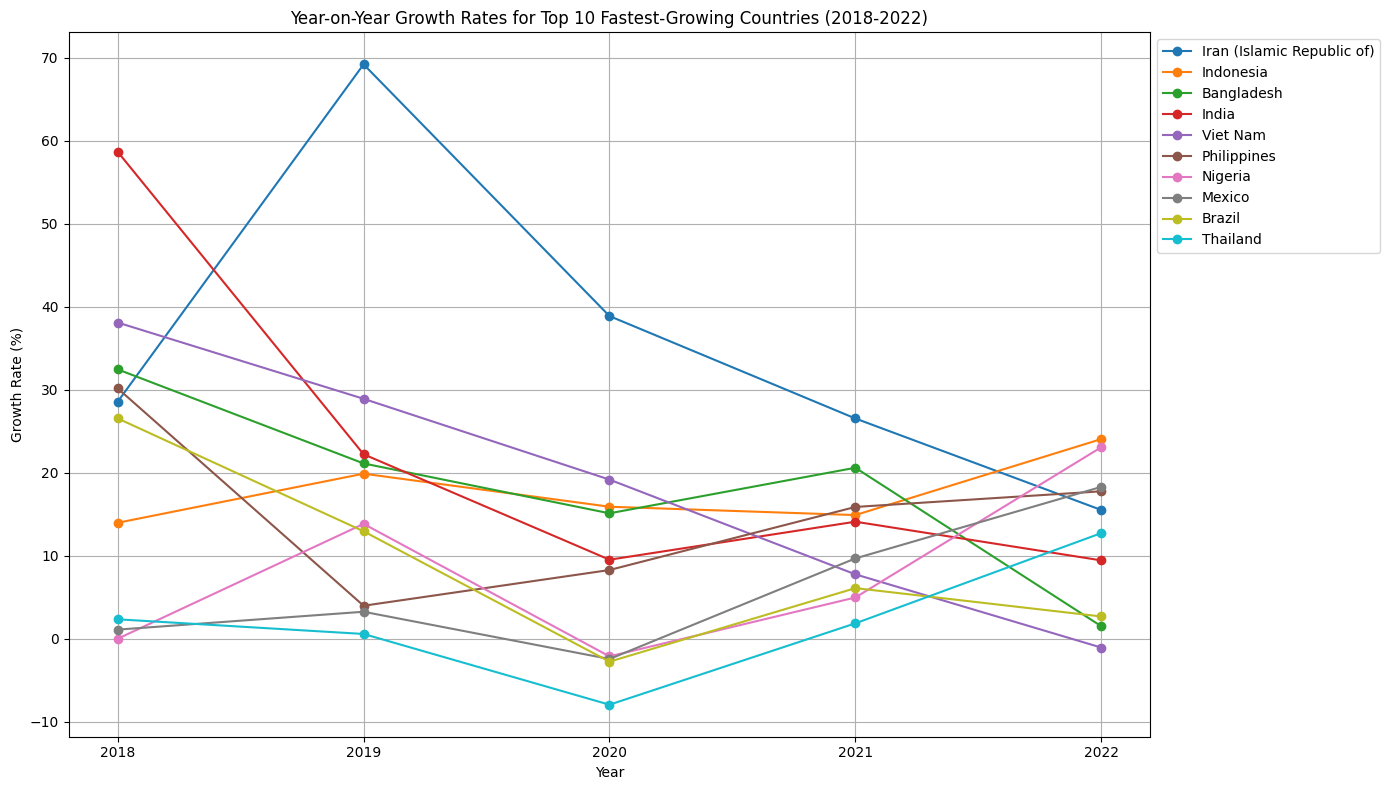

In [190]:
# Convert 'Year' and 'Enrollment' to numeric if they're not already
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Pivot data to have years as columns for each country
pivot_df = data_long.pivot_table(index='Country', columns='Year', values='Enrollment', aggfunc='sum')

# Calculate year-on-year percentage growth for each country
year_on_year_growth = pivot_df.pct_change(axis=1) * 100

# Filter for only the top 10 countries
top_10_growth = year_on_year_growth.loc[growth_rates.nlargest(10).index]

# Plotting
plt.figure(figsize=(14, 8))

# Ensure the DataFrame is not empty
if not top_10_growth.empty:
    # Plotting only for the specified range of years
    for country in growth_rates.nlargest(10).index:
        # Some countries might not have complete data for all years, leading to NaN values in year-on-year growth.
        # Ensure there's data for at least one year before attempting to plot.
        if country in top_10_growth.index and not top_10_growth.loc[country, start_year:last_year].isnull().all():
            plt.plot(top_10_growth.loc[country, start_year:last_year].index, top_10_growth.loc[country, start_year:last_year], marker='o', label=country)
        else:
            print(f"Skipping {country} due to insufficient data.")

    plt.title(f'Year-on-Year Growth Rates for Top 10 Fastest-Growing Countries ({start_year}-{last_year})')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    # Set x-ticks to the specified range
    plt.xticks(range(start_year, last_year + 1))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the top 10 countries.")

## Last 3 Years

In [191]:
# Convert 'Year' and 'Enrollment' to numeric
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Specify the period of interest
last_year = 2022
start_year = 2020

# Filter countries with more than 100 students in 2023
countries_with_100_plus = data_long[(data_long['Year'] == last_year) & (data_long['Enrollment'] > 100)]['Country'].unique()

# Calculate total enrollment for each country at the start and end of the period, only for countries with more than 100 students in 2023
start_totals = data_long[(data_long['Year'] == start_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()
end_totals = data_long[(data_long['Year'] == last_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()

# Calculate growth rates for these countries
growth_rates = ((end_totals - start_totals) / start_totals) * 100

# Remove any NaN or infinite values that may have resulted from division by zero
growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

print("Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):")
print(growth_rates.nlargest(10))

Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):
Country
France                                                  81.415929
United Kingdom of Great Britain and Northern Ireland    47.852761
Iran (Islamic Republic of)                              46.181818
Japan                                                   43.622449
Indonesia                                               42.549020
Philippines                                             36.470588
Singapore                                               34.567901
Mexico                                                  29.749104
Nigeria                                                 29.192547
India                                                   24.877068
Name: Enrollment, dtype: float64


C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1126580793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1126580793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


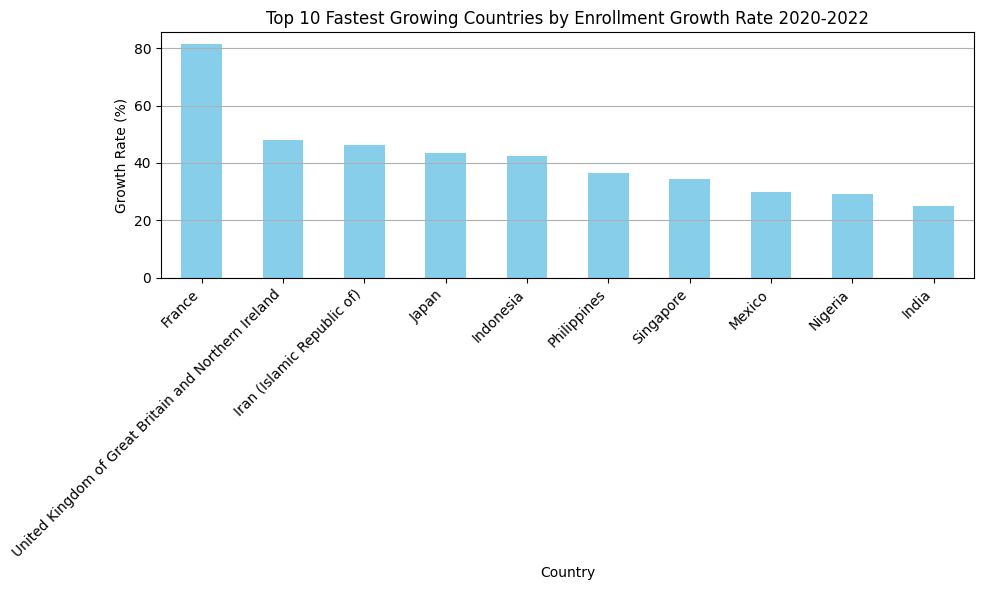

In [192]:
growth_rates.nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Fastest Growing Countries by Enrollment Growth Rate 2020-2022')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1222126664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1222126664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


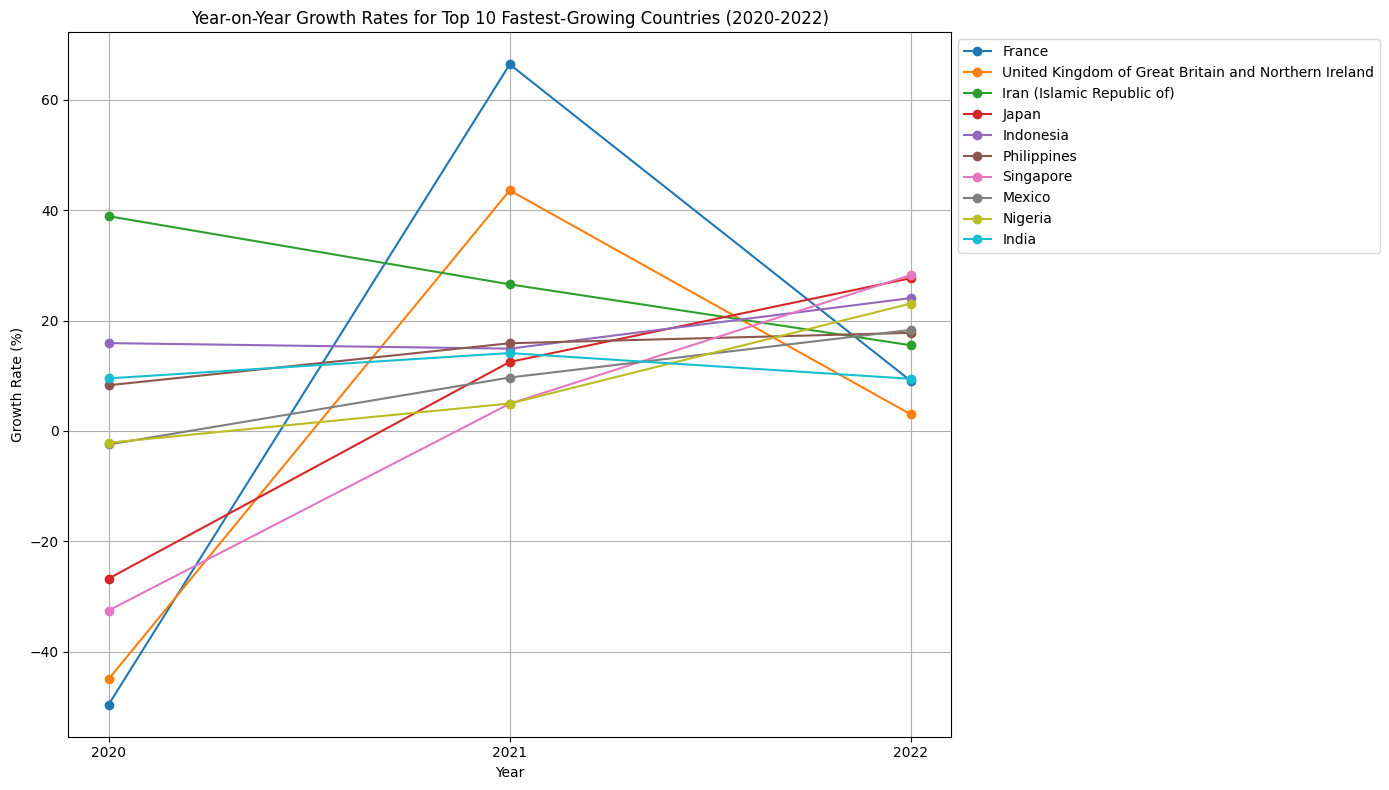

In [193]:
# Convert 'Year' and 'Enrollment' to numeric if they're not already
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Pivot data to have years as columns for each country
pivot_df = data_long.pivot_table(index='Country', columns='Year', values='Enrollment', aggfunc='sum')

# Calculate year-on-year percentage growth for each country
year_on_year_growth = pivot_df.pct_change(axis=1) * 100

# Filter for only the top 10 countries
top_10_growth = year_on_year_growth.loc[growth_rates.nlargest(10).index]

# Plotting
plt.figure(figsize=(14, 8))

# Ensure the DataFrame is not empty
if not top_10_growth.empty:
    # Plotting only for the specified range of years
    for country in growth_rates.nlargest(10).index:
        # Some countries might not have complete data for all years, leading to NaN values in year-on-year growth.
        # Ensure there's data for at least one year before attempting to plot.
        if country in top_10_growth.index and not top_10_growth.loc[country, start_year:last_year].isnull().all():
            plt.plot(top_10_growth.loc[country, start_year:last_year].index, top_10_growth.loc[country, start_year:last_year], marker='o', label=country)
        else:
            print(f"Skipping {country} due to insufficient data.")

    plt.title(f'Year-on-Year Growth Rates for Top 10 Fastest-Growing Countries ({start_year}-{last_year})')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    # Set x-ticks to the specified range
    plt.xticks(range(start_year, last_year + 1))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the top 10 countries.")

Country
(blank)                           The University of Victoria
Afghanistan    The University of British Columbia (Okanagan)
Albania        The University of British Columbia (Okanagan)
Algeria                           Thompson Rivers University
Andorra                               Royal Roads University
                                   ...                      
Viet Nam                             Simon Fraser University
Yemen          The University of British Columbia (Okanagan)
Yugoslavia                            Royal Roads University
Zambia                                Royal Roads University
Zimbabwe                          Thompson Rivers University
Length: 192, dtype: object


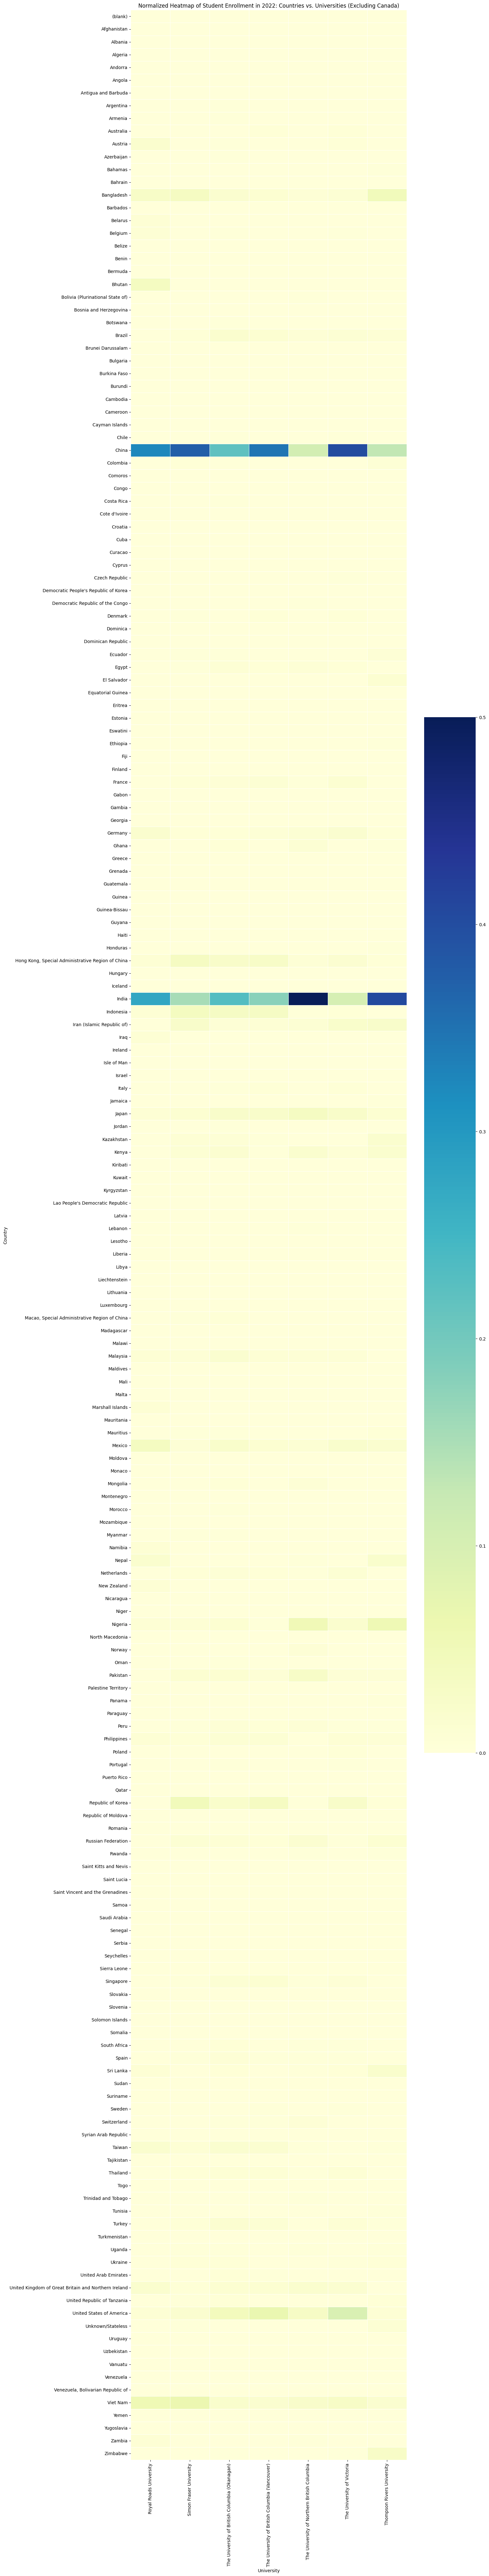

In [199]:
analysis_year = 2022

# Filter the DataFrame for the analysis year
year_data = data_long[data_long['Year'] == analysis_year]

# Aggregate the data by 'Country' and 'University' for the selected year
country_uni_enrollment = year_data.groupby(['Country', 'University'])['Enrollment'].sum().reset_index()

# Normalize the data by the total enrollment at each university
total_enrollment_by_uni = country_uni_enrollment.groupby('University')['Enrollment'].sum().reset_index()
normalized_enrollment = country_uni_enrollment.set_index('University').join(total_enrollment_by_uni.set_index('University'), on='University', rsuffix='_total')
normalized_enrollment['Normalized_Enrollment'] = normalized_enrollment['Enrollment'] / normalized_enrollment['Enrollment_total']

# Pivot the normalized data to get a matrix of countries vs. universities
normalized_pivot = normalized_enrollment.pivot_table(index='Country', columns='University', values='Normalized_Enrollment', fill_value=0)

top_uni_by_country = normalized_pivot.idxmax(axis=1)
print(top_uni_by_country)

# Visualize the relationship using a heatmap
plt.figure(figsize=(14, 100))
sns.heatmap(normalized_pivot, cmap="YlGnBu", linewidths=.5)
plt.title(f'Normalized Heatmap of Student Enrollment in {analysis_year}: Countries vs. Universities (Excluding Canada)')
plt.xlabel('University')
plt.ylabel('Country')
plt.show()